In [2]:
import matplotlib.pyplot as plt
import os
from scipy import signal
import numpy as np
from scipy.fftpack import fft,ifft
import pandas as pd
from pandas import DataFrame

In [17]:
file_dire='../../01-TrainingData-qLua/'
data_dire='../../01-TrainingData-qLua/01/Sensor'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


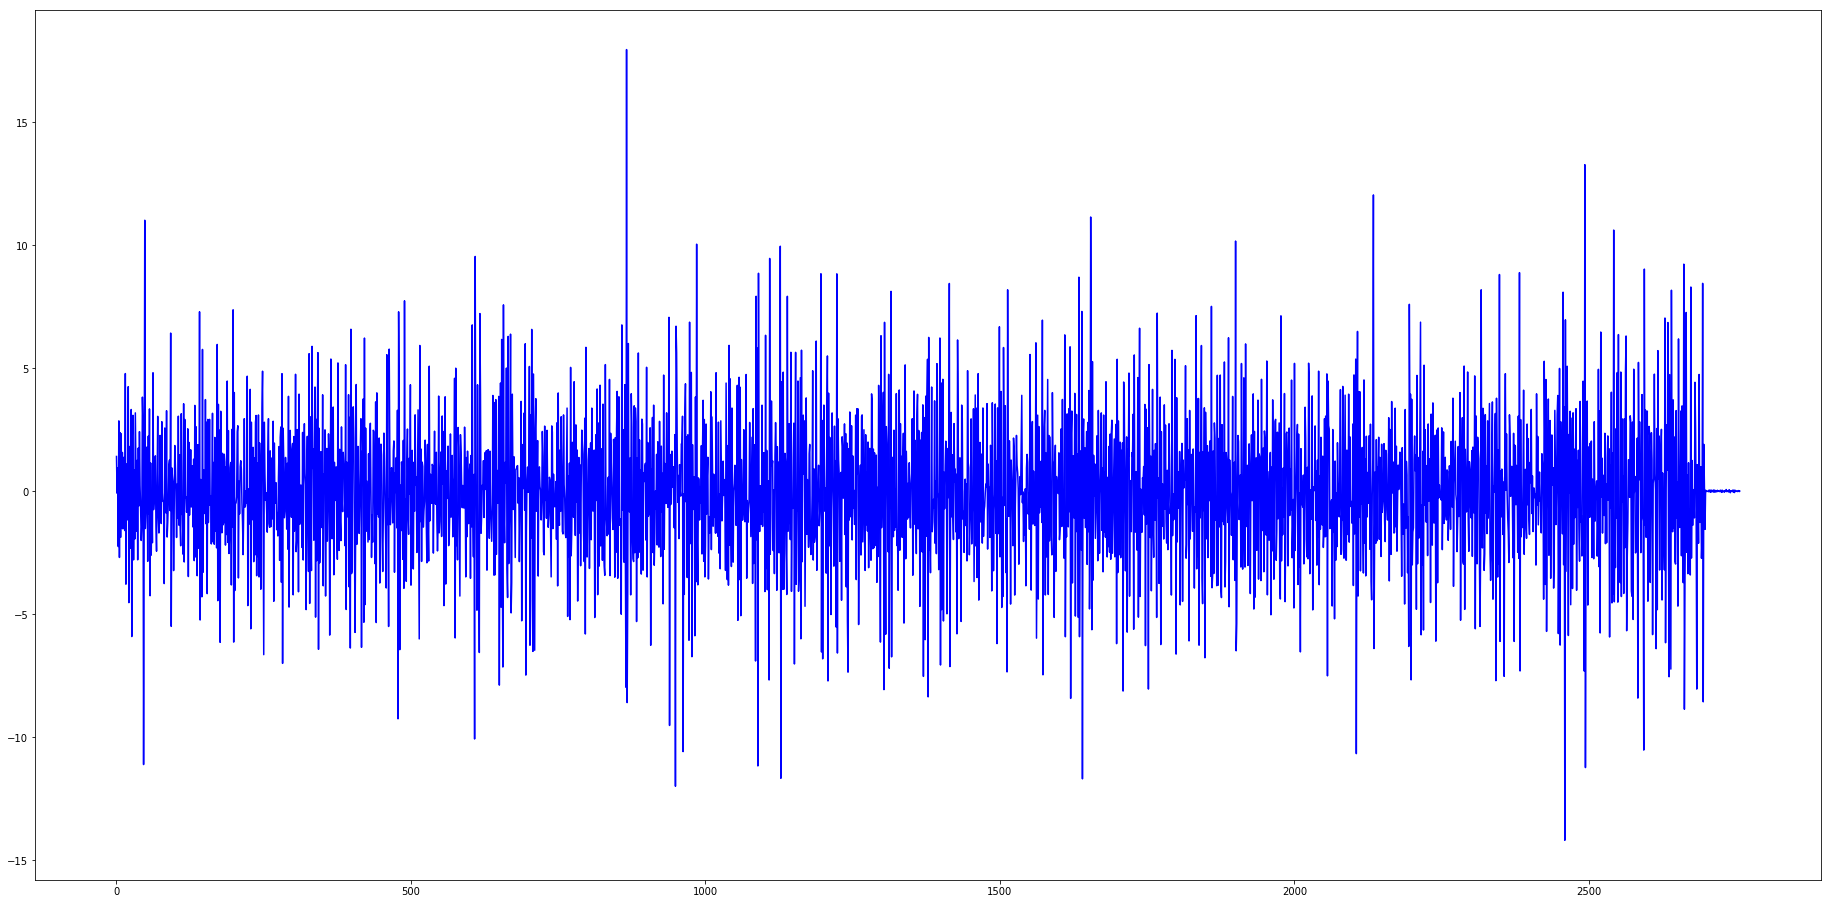

In [18]:
file_list=os.listdir(data_dire)
err_list=[]
for index in range(1,len(file_list)):
    df_sensor=pd.read_csv(os.path.join(data_dire,str(index)+'.csv'))
    print(index)
    start=0
    end=1
    window=25600
    last_freqs=np.fft.fft(df_sensor['current'][window*start:window*end])
    for _ in range(1,df_sensor.shape[0]//25600):
        freqs=np.fft.fft(df_sensor['current'][window*_:window*(_+1)])
        err=np.mean((np.array(freqs)-np.array(last_freqs))) 
        err_list.append(err)
        last_freqs=freqs
        
fig=plt.figure(figsize=(32,16))
ax=fig.add_subplot(1,1,1)
ax.plot(range(len(err_list)),err_list,color='b')
plt.show()

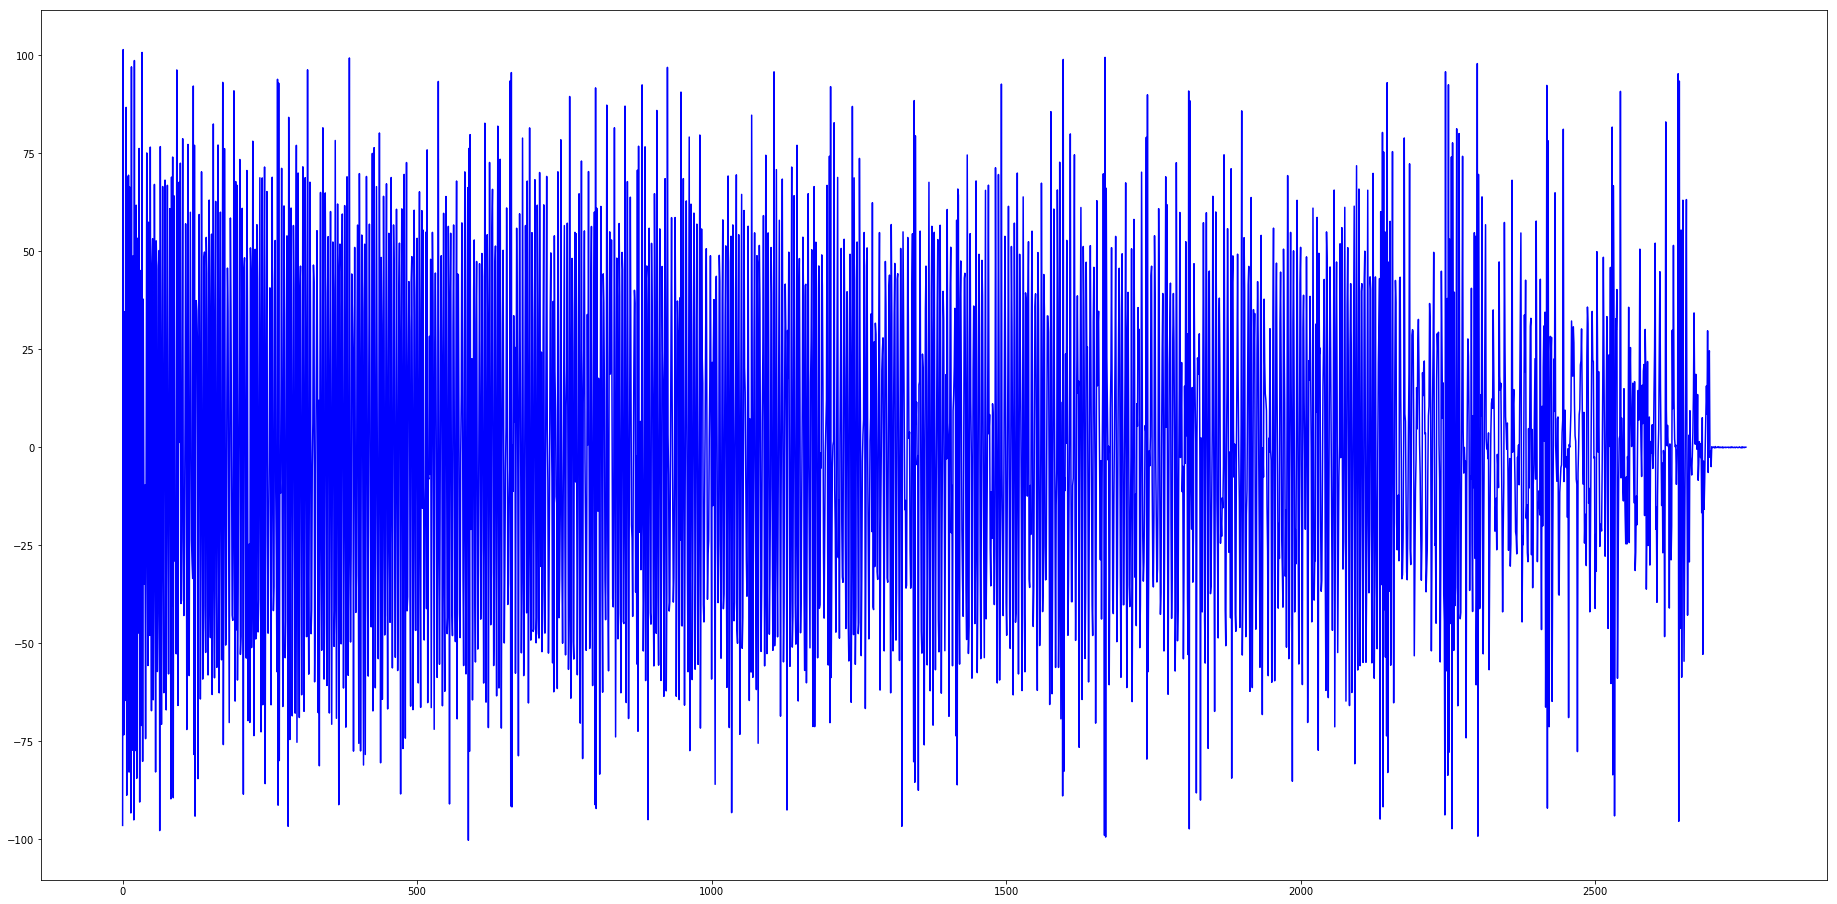

In [7]:
fig=plt.figure(figsize=(32,16))
ax=fig.add_subplot(1,1,1)
ax.plot(range(len(err_list)),err_list,color='b')
plt.show()

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


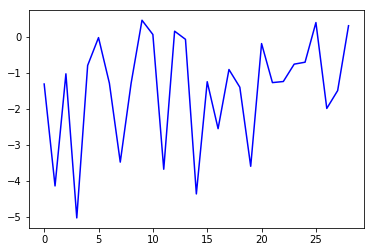

In [14]:
file_list=os.listdir(data_dire)
err_list=[]
df_sensor=pd.read_csv(os.path.join(data_dire,'2.csv'))
length=df_sensor.shape[0]
last_freqs=np.fft.fft(df_sensor['current'])
for index in range(3,len(file_list)):
    print(index)
    df_sensor=pd.read_csv(os.path.join(data_dire,str(index)+'.csv'))
    if(df_sensor.shape[0]==length):
        freqs=np.fft.fft(df_sensor['current'])
        err=np.mean(freqs-last_freqs) 
        err_list.append(err)
#         last_freqs=freqs
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(range(len(err_list)),err_list,color='b')
plt.show()


In [ ]:
print('finished')

In [ ]:
for index in range(1,4):
    df_sensor=pd.read_csv(os.path.join(file_dire,'0'+str(index),'Sensor'+'1.csv'))
    start=0
    end=1
    window=25600
    last_freqs=np.fft.fft(df_sensor['vibration_1'][window*start:window*end])
    